<a href="https://colab.research.google.com/github/coderman400/autism-prediction/blob/main/autism_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**imports**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**read data**

In [59]:
df = pd.read_csv("train.csv")

In [60]:
df.shape

(800, 22)

In [61]:
df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [62]:
df.tail(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
790,791,1,0,1,1,1,1,1,0,1,...,m,Others,no,no,India,no,4.846236,18 and more,Self,0
791,792,0,0,0,1,1,1,0,0,0,...,m,Black,no,no,Australia,no,8.687281,18 and more,Self,0
792,793,1,0,0,0,0,0,0,0,0,...,m,?,no,no,Bolivia,no,9.403804,18 and more,Self,0
793,794,0,0,0,0,0,0,0,0,0,...,m,?,no,no,United Kingdom,no,9.777375,18 and more,Self,0
794,795,0,1,0,0,1,0,0,1,0,...,m,?,no,no,India,no,9.592719,18 and more,Self,0
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [64]:
# prompt: remove the NA value records in df["age"]

df = df.dropna(subset=['age'])

In [65]:
df["age"]=df["age"].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [67]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'ID': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [68]:
# prompt: drop age_desc col

# Drop the 'age_desc' column
df = df.drop('age_desc', axis=1)

In [69]:
for col in df.columns:
  print(col, len(df[col].unique()))

ID 800
A1_Score 2
A2_Score 2
A3_Score 2
A4_Score 2
A5_Score 2
A6_Score 2
A7_Score 2
A8_Score 2
A9_Score 2
A10_Score 2
age 79
gender 2
ethnicity 12
jaundice 2
austim 2
contry_of_res 56
used_app_before 2
result 800
relation 6
Class/ASD 2


In [70]:
df = df.rename(columns={"contry_of_res": "country_of_res"})
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [71]:
df["country_of_res"] = df["country_of_res"].replace("AmericanSamoa", "United States")
df["country_of_res"] = df["country_of_res"].replace("Hong Kong","China")

In [72]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [73]:
df["relation"].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [74]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Significant class imbalance in target class**

**EDA**

In [75]:
df.shape

(800, 21)

In [76]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

In [77]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,38,f,?,no,no,Austria,no,6.351166,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,47,m,?,no,no,India,no,2.255185,Self,0


In [78]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Mean:  27.96375
Median:  24.0


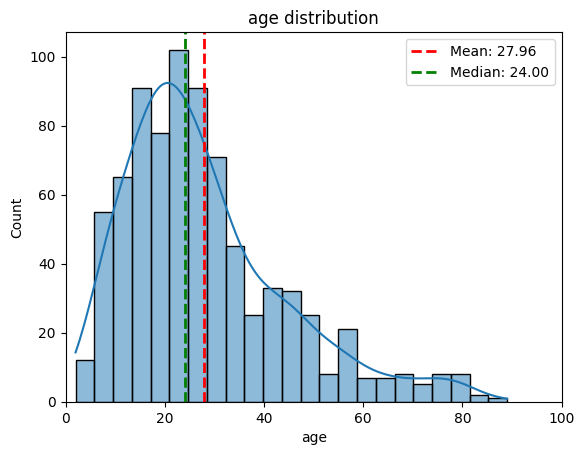

In [79]:
sns.histplot(df["age"], kde=True)
plt.xlim(0,100)
plt.title("age distribution")

agemean = df["age"].mean()
agemedian = df["age"].median()

plt.axvline(agemean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {agemean:.2f}')
plt.axvline(agemedian, color='green', linestyle='dashed', linewidth=2, label=f'Median: {agemedian:.2f}')

print("Mean: ",agemean)
print("Median: ",agemedian)
plt.legend()
plt.show()

Mean:  8.537303106501248
Median:  9.605299308


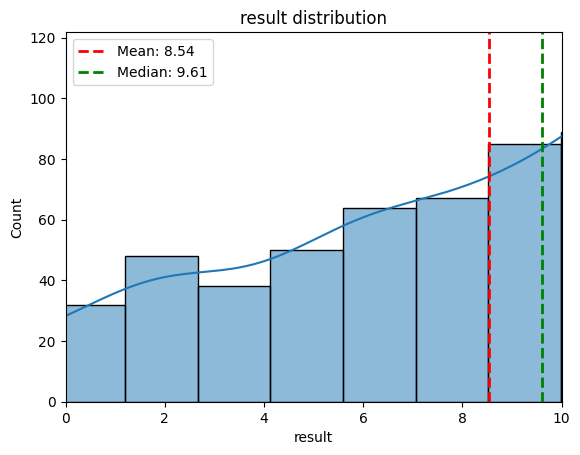

In [80]:
sns.histplot(df["result"], kde=True)
plt.xlim(0,10)
plt.title("result distribution")

resultmean = df["result"].mean()
resultmedian = df["result"].median()

plt.axvline(resultmean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {resultmean:.2f}')
plt.axvline(resultmedian, color='green', linestyle='dashed', linewidth=2, label=f'Median: {resultmedian:.2f}')

print("Mean: ",resultmean)
print("Median: ",resultmedian)
plt.legend()
plt.show()

**BOX PLOT TO IDENTIFY OUTLIERS**

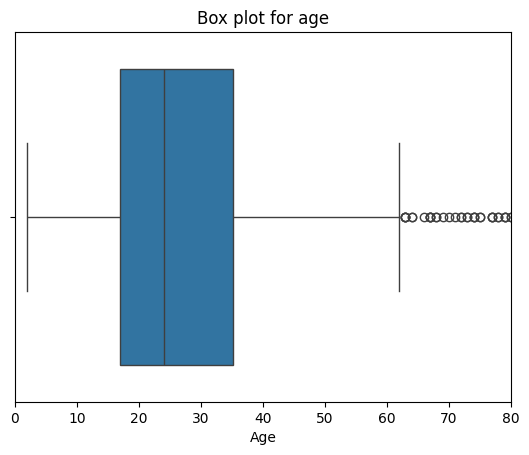

In [81]:
sns.boxplot(x=df["age"])
plt.xlim(0,80)
plt.title("Box plot for age")
plt.xlabel("Age")
plt.show()

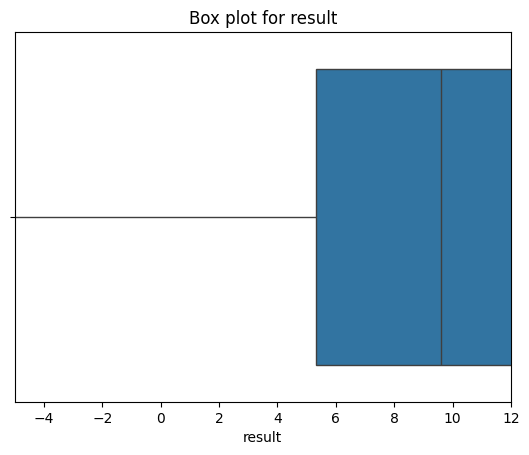

In [82]:
sns.boxplot(x=df["result"])
plt.xlim(-5,12)
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()

In [83]:
#count outliers using IQR
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("Number of age outliers: ", len(outliers))

Number of age outliers:  39


In [84]:
#count outliers using IQR
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
print("Number of result outliers: ",len(outliers))

Number of result outliers:  1


**UNIVARIATE ANALYSIS FOR CATEGORICAL COLS**

In [85]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'used_app_before', 'result', 'relation', 'Class/ASD'],
      dtype='object')

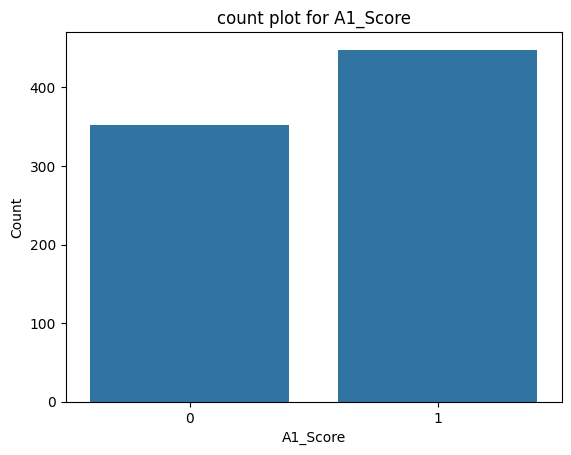

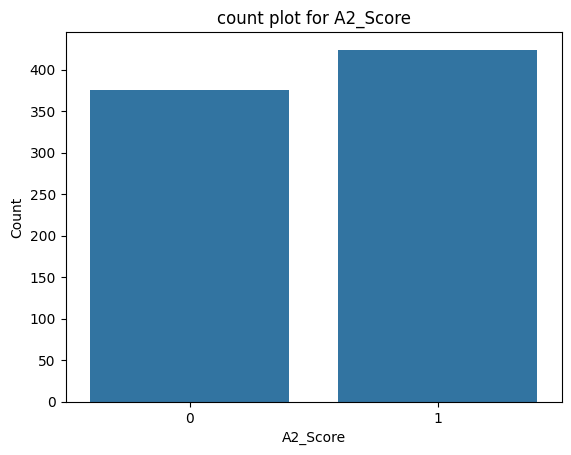

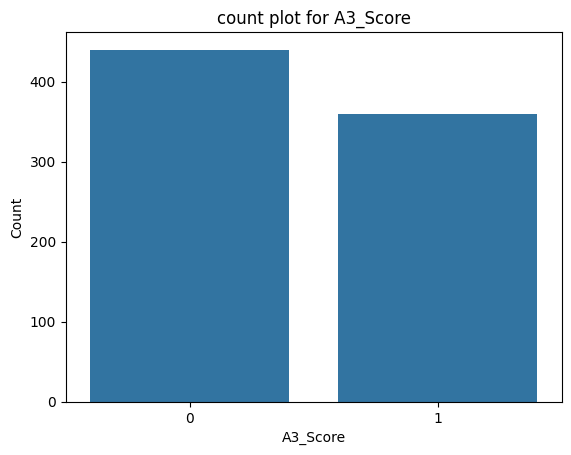

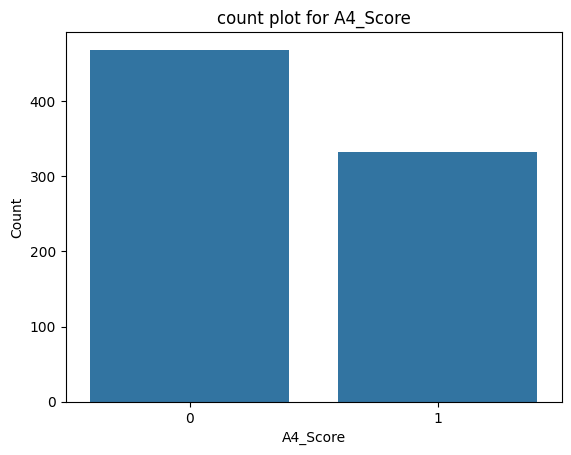

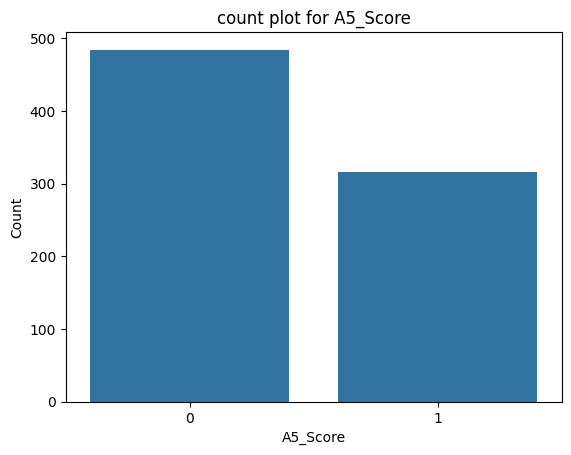

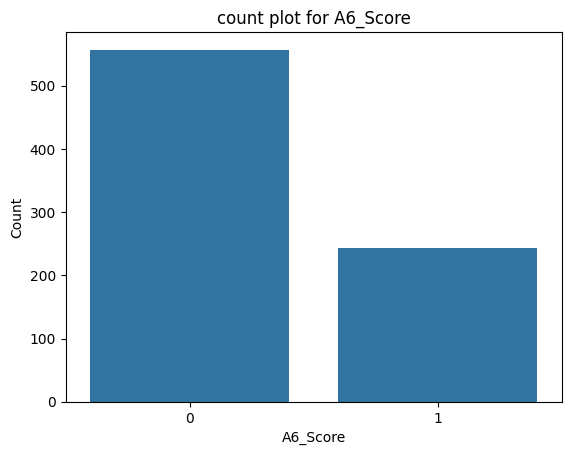

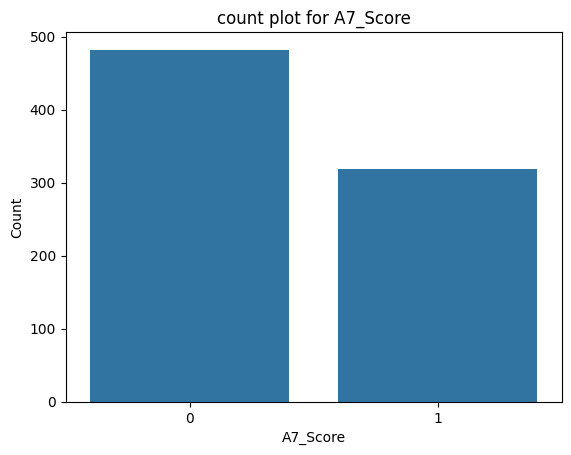

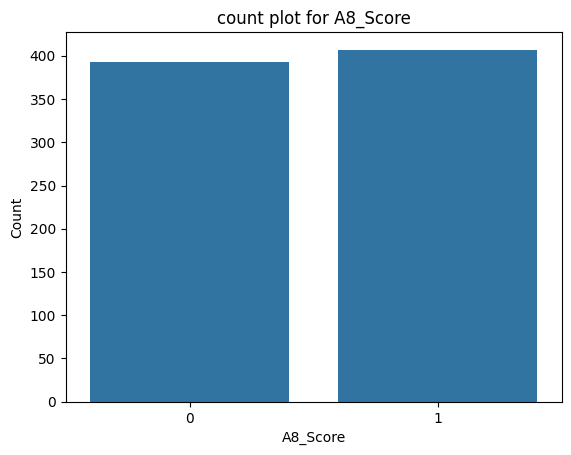

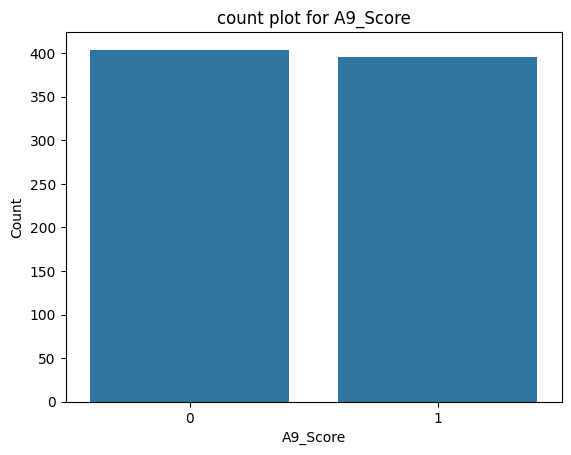

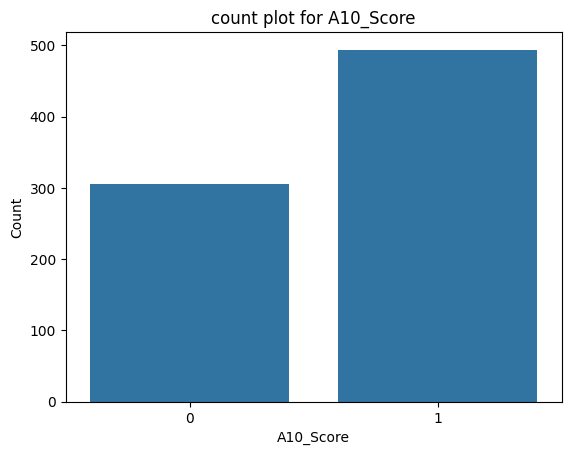

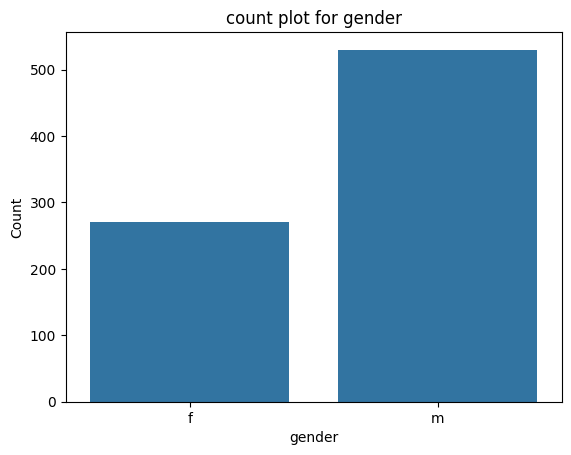

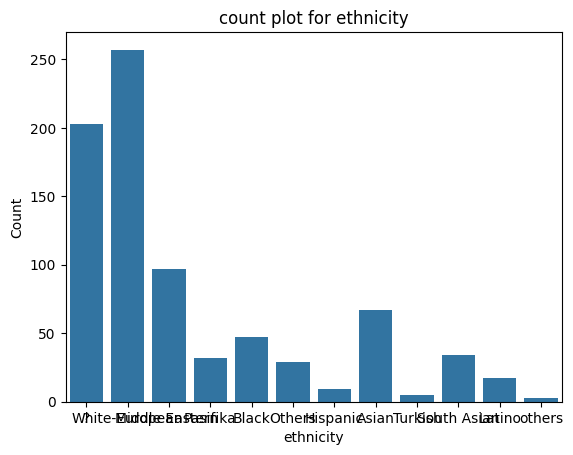

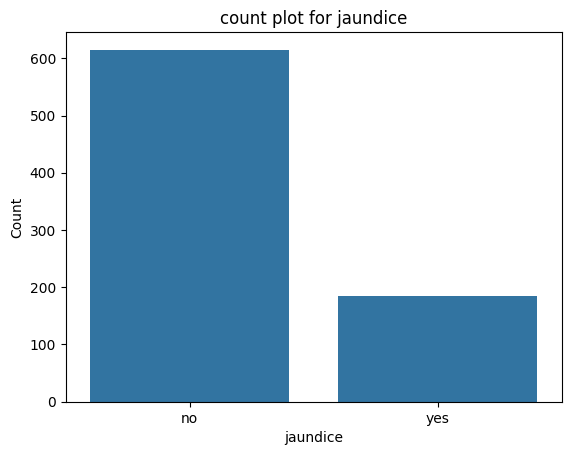

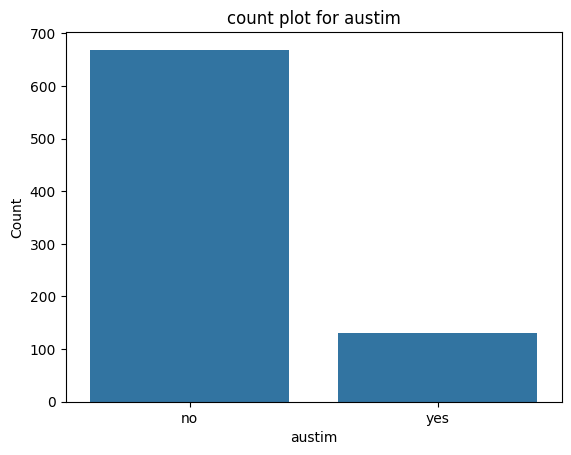

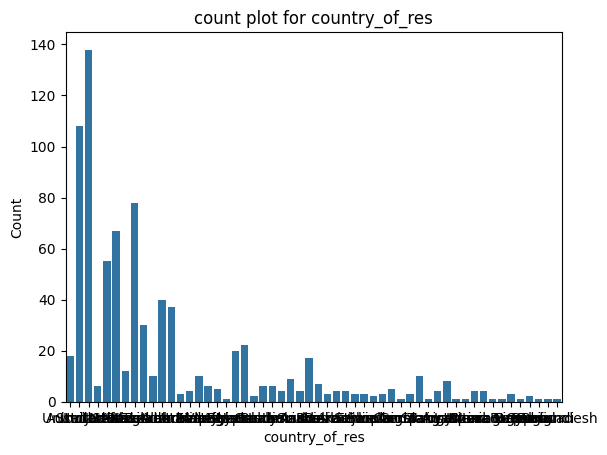

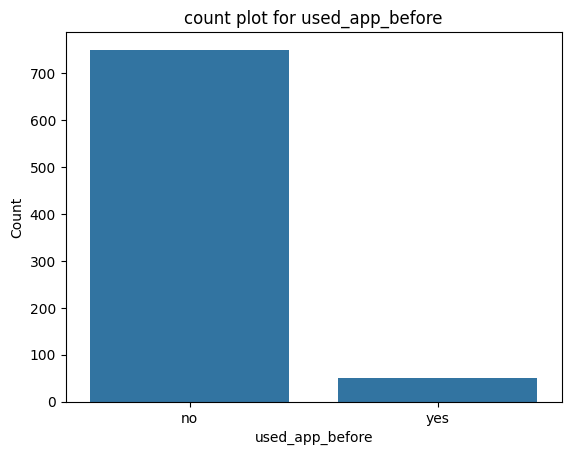

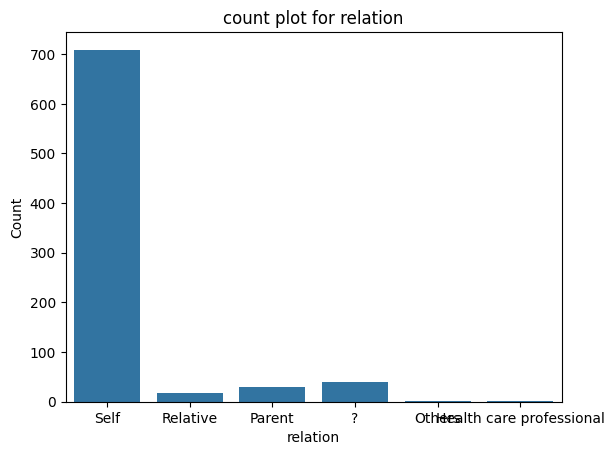

In [86]:
categorical_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
        'relation']

for col in categorical_cols:
  sns.countplot(x=df[col])
  plt.title(f"count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

In [87]:
#merge others except self
df["relation"] = df["relation"].replace("Parent", "Others")
df["relation"] = df["relation"].replace("Other", "Others")
df["relation"] = df["relation"].replace("?", "Others")
df["relation"] = df["relation"].replace("Relative", "Others")
df["relation"] = df["relation"].replace("Health care professional", "Others")

In [88]:
df["relation"].value_counts()

,count
relation,
Self,709
Others,91


In [89]:
df["ethnicity"].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [90]:
#merge ? into others
df["ethnicity"] = df["ethnicity"].replace("?", "others")

**LABEL ENCODING**

In [91]:
#identify cols with object datatype

object_cols = df.select_dtypes(include=['object']).columns
object_cols

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [92]:
encoders = {}

#apply label encoding and store encoders
for col in object_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le

#save encoders as pickle file
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [93]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [94]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,38,0,10,0,0,6,0,6.351166,1,0
1,2,0,0,0,0,0,0,0,0,0,...,47,1,10,0,0,23,0,2.255185,1,0
2,3,1,1,1,1,1,1,1,1,1,...,7,1,9,0,1,52,0,14.851484,1,1
3,4,0,0,0,0,0,0,0,0,0,...,23,0,10,0,0,52,0,2.276617,1,0
4,5,0,0,0,0,0,0,0,0,0,...,43,1,10,0,0,44,0,-4.777286,1,0


**BIVARIATE ANALYSIS**

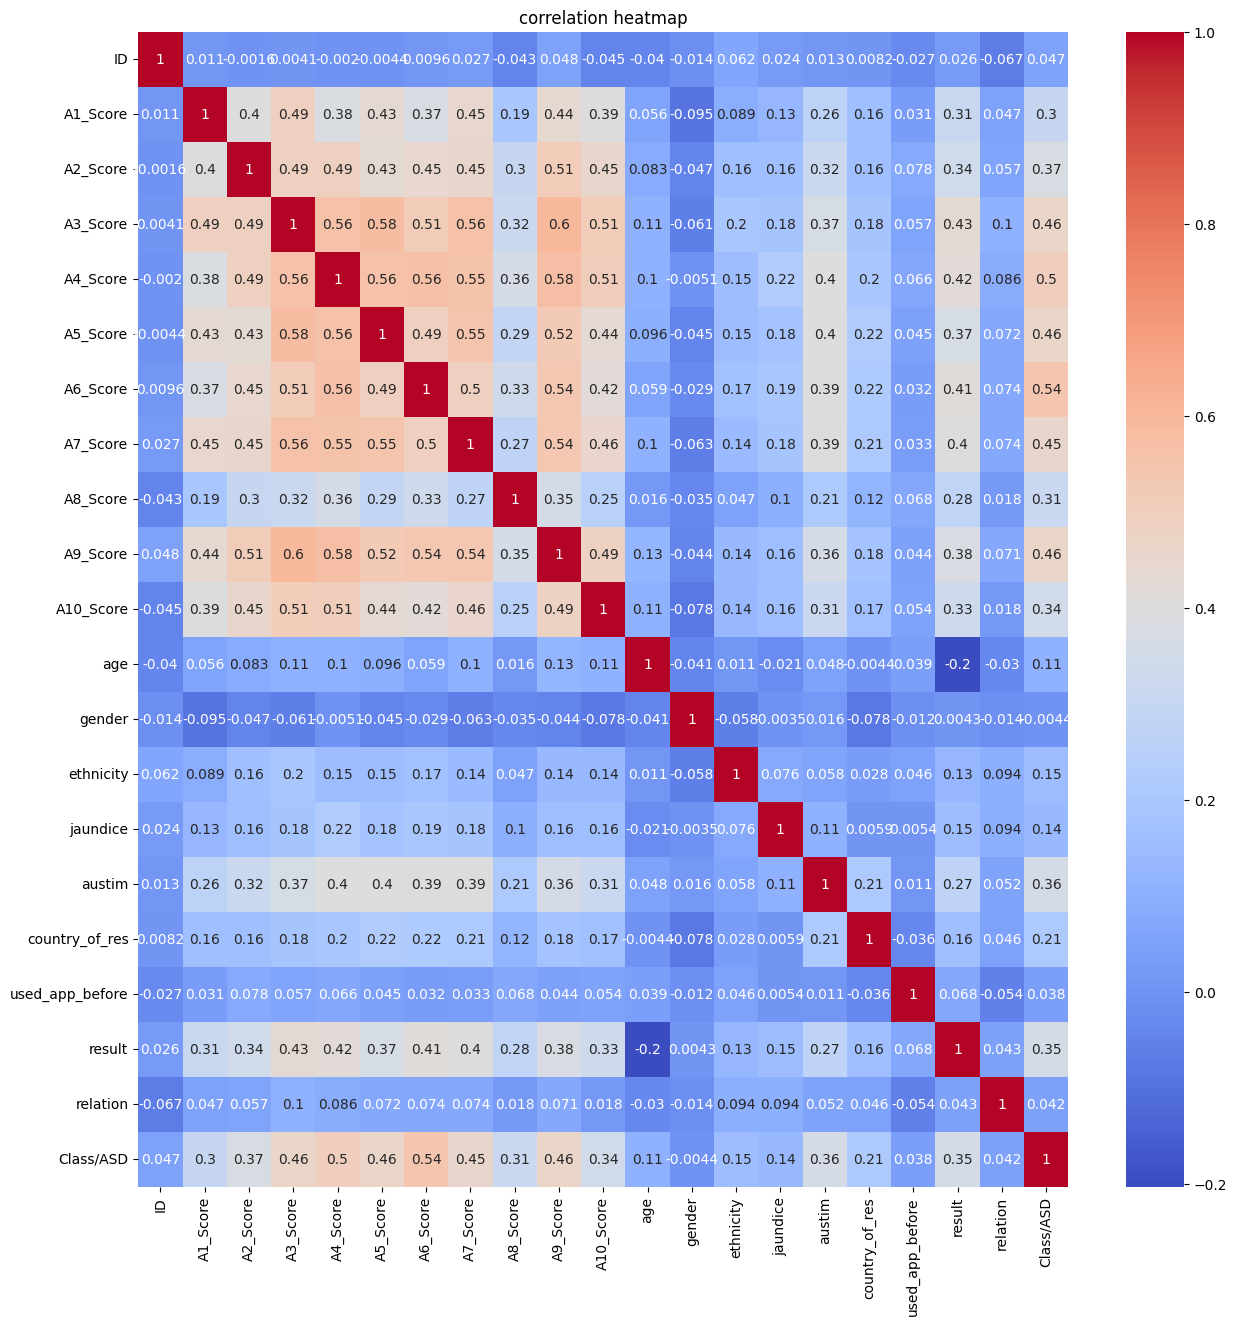

In [95]:
#CORRELATION MATRIX
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

**INSIGHTS FROM EDA:**
- Few outliers in age
- Class imbalance in target col
- Class imablance in categorical features
- No highly correlated columns
- Performed label encoding and saved encoders

# Data Preprocessing

In [96]:
#function to replace outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()

    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

In [97]:
#replace outliers in age column
df = replace_outliers_with_median(df, "age")

In [98]:
df.shape

(800, 21)

**Train test split**

In [99]:
x = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [102]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [103]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE for addressing class imbalance through oversampling**

In [104]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [105]:
print(y_train_resampled.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


# MODEL TRAINING
Using DT, RF, XGB

In [106]:
# list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [107]:
!pip install scikit-learn==1.2.2

In [108]:
# dictionary to store cross validation res
cv_results = {}

#perform 5 fold cross validation for each model
for name, model in models.items():
  print(f"training {name} with default params")
  cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
  cv_results[name] = cv_score
  print(f"{name} CV accuracy: {np.mean(cv_score):.2f}")
  print("-"*50)


training Decision Tree with default params
Decision Tree CV accuracy: 0.80
--------------------------------------------------
training Random Forest with default params
Random Forest CV accuracy: 0.86
--------------------------------------------------
training XGBoost with default params
XGBoost CV accuracy: 0.86
--------------------------------------------------


In [109]:
cv_results

{'Decision Tree': array([0.8515625, 0.7890625, 0.7890625, 0.765625 , 0.7890625]),
 'Random Forest': array([0.8671875, 0.890625 , 0.8515625, 0.859375 , 0.8515625]),
 'XGBoost': array([0.8828125, 0.8984375, 0.8046875, 0.875    , 0.8203125])}

# Model Selection and Hyperparameter tuning

In [110]:
#init models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)


In [115]:
#hyperparameter grids for randomizedsearchcv
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20,30, 50, 70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf = {
    "n_estimators": [50,100,200,500],
    "max_depth": [None, 10, 20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3,5,7,10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5,0.7,1.0],
    "colsample_bytree": [0.5,0.7,1.0]
}


In [116]:
#hyperparameter tuning for 3 tree based models

#perform randomized search CV for each model
random_search_dt = RandomizedSearchCV(dt_model, param_grid_dt, cv=5, scoring="accuracy", n_iter=20, random_state=42)
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, cv=5, scoring="accuracy", n_iter=20, random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=5, scoring="accuracy", n_iter=20, random_state=42)





In [118]:
#fit the models
random_search_dt.fit(x_train_resampled, y_train_resampled)
random_search_rf.fit(x_train_resampled, y_train_resampled)
random_search_xgb.fit(x_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [120]:
print(random_search_xgb.best_score_)

0.9155339805825242


In [121]:
#get model with best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_


In [123]:
print(best_model)
best_score

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=50, random_state=42)


0.9165048543689321

In [124]:
 with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

# Model evaluation

In [130]:
#evaluate on test data
y_test_pred = best_model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy:  0.81875
[[110  14]
 [ 15  21]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       124
           1       0.60      0.58      0.59        36

    accuracy                           0.82       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.82      0.82      0.82       160

